# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [100]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [101]:
# your answer here
employee = pd.read_csv('data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [102]:
# Method 1
# your answer here
employee.groupby('Department').agg({'Salary': 'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [103]:
# Method 2
# your answer here

#no need to pass aggfunc = 'mean' as the default is already the mean
employee.pivot_table(index = 'Department', values = 'Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [104]:
# your answer here
employee.pivot_table(index = ['Department', 'Title'], values = 'Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [105]:
# your answer here

# Ok, this actually looks super cool
employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', columns = 'Years', 
                     fill_value = '-')

Years                  1   2   3   4   7   8
Department Title                            
HR         VP          -   -   -   -   -  70
           analyst     -  30   -  35   -   -
IT         VP          -   -   -   -   -  70
           analyst    35  30   -   -   -   -
           associate   -   -   -   -  60   -
Sales      associate   -  55  55   -   -   -

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [107]:
# your answer here
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary', 'Gender'], aggfunc = 
                     {'Salary': 'mean', 'Gender': 'count'}).rename(columns = 
                                                                   {'Gender': '# Employees'})

# Employees  Salary
Department Title                         
HR         VP                   1    70.0
           analyst              2    32.5
IT         VP                   1    70.0
           analyst              2    32.5
           associate            1    60.0
Sales      associate            2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [117]:
# your answer here

'''
Well, for HR-VP / IT-VP / IT-associate there is only one person there, that's why the values are
always the same and there is no STD.
We can confirm that by looking at the other pivot table above, as well, in the '# Employees' col.
'''
almost_a_dot_describe = employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', 
                     aggfunc = ['median', 'min', 'max', 'std'])

almost_a_dot_describe

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [111]:
# your answer here

# Tried filling above directly in the same line like before, with the 'fill_value' arg, but this
# time it didn't work, for some reason
almost_a_dot_describe.fillna(0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spent on salaries. Could you provide that information? 

In [118]:
# your answer here
employee.pivot_table(index = 'Department', values = ['Salary', 'Gender'], 
                     aggfunc = {'Salary': 'sum', 'Gender': 'count'}).rename(columns = 
                                                                            {'Gender': '# Employees'})

,# Employees,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the total years of work experience and the mean salary.

In [113]:
# your answer here
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary', 'Years'], 
                     aggfunc = {'Salary': 'mean', 'Years': 'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [120]:
# your answer here
fitbit = pd.read_csv('data/fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [122]:
# your answer here
# Checking data types
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [124]:
# your answer here
# Checking the statistics
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [134]:
# your answer here
fitbit.corr()['Minutes Very Active']['Steps']

0.571451848106261

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

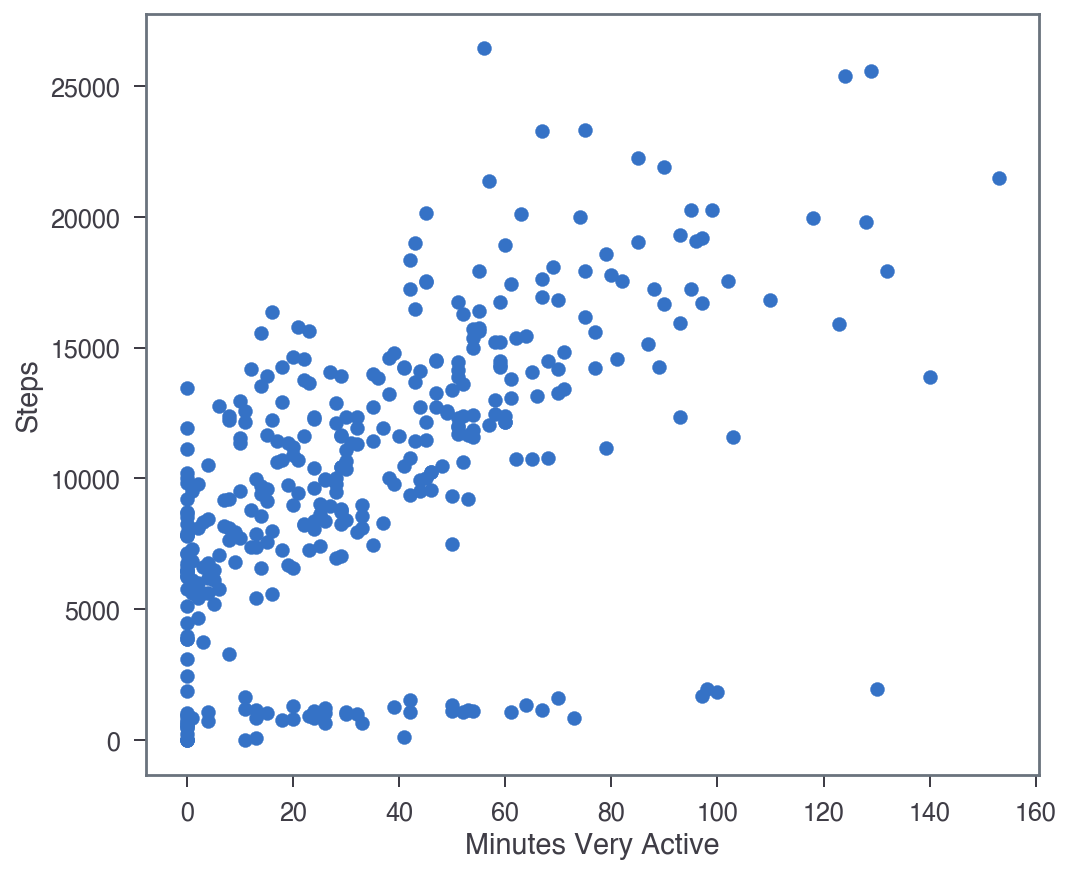

In [138]:
# your answer here
# Doing this with matplotlib just this one time 'cause you asked kindly :D
plt.scatter(x = 'Minutes Very Active', y = 'Steps', data = fitbit)
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps');

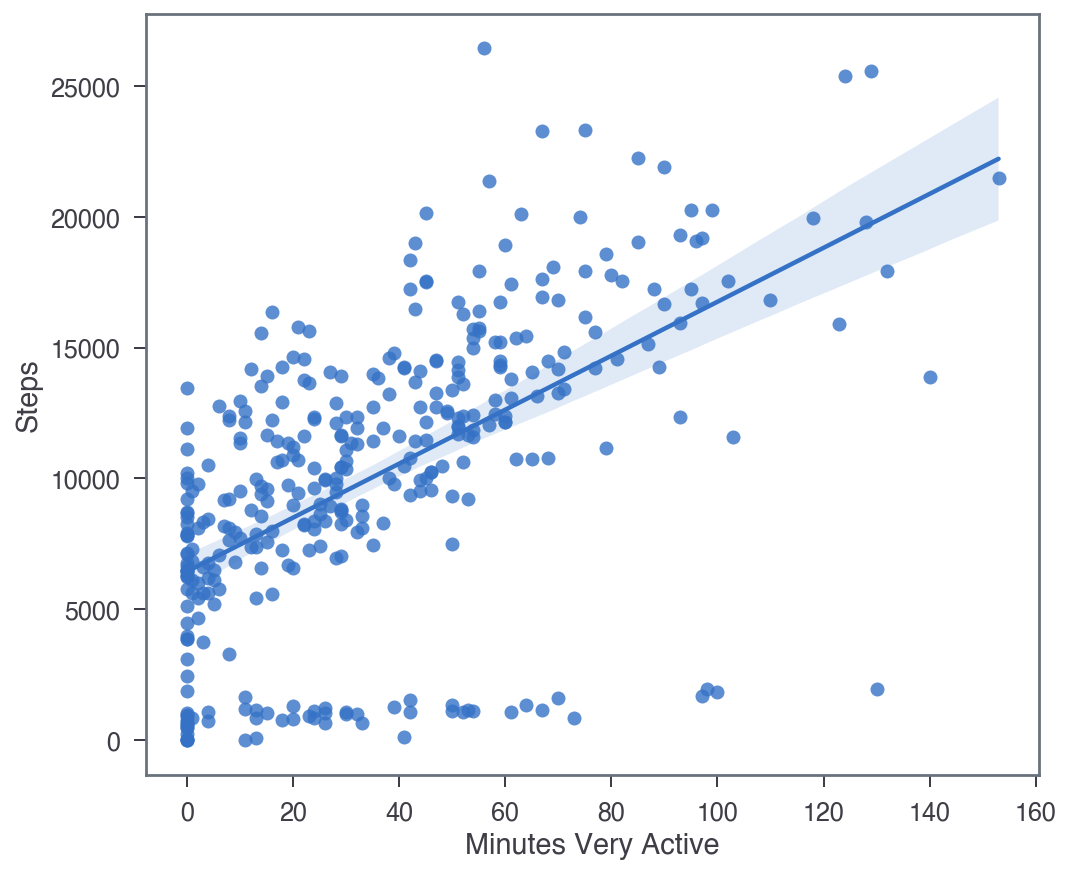

In [140]:
# I prefer using seaborn for this, already gives me the regression line and labels :D
sns.regplot(x = 'Minutes Very Active', y = 'Steps', data = fitbit, fit_reg = True)

Correlation: 0.7544261003916322


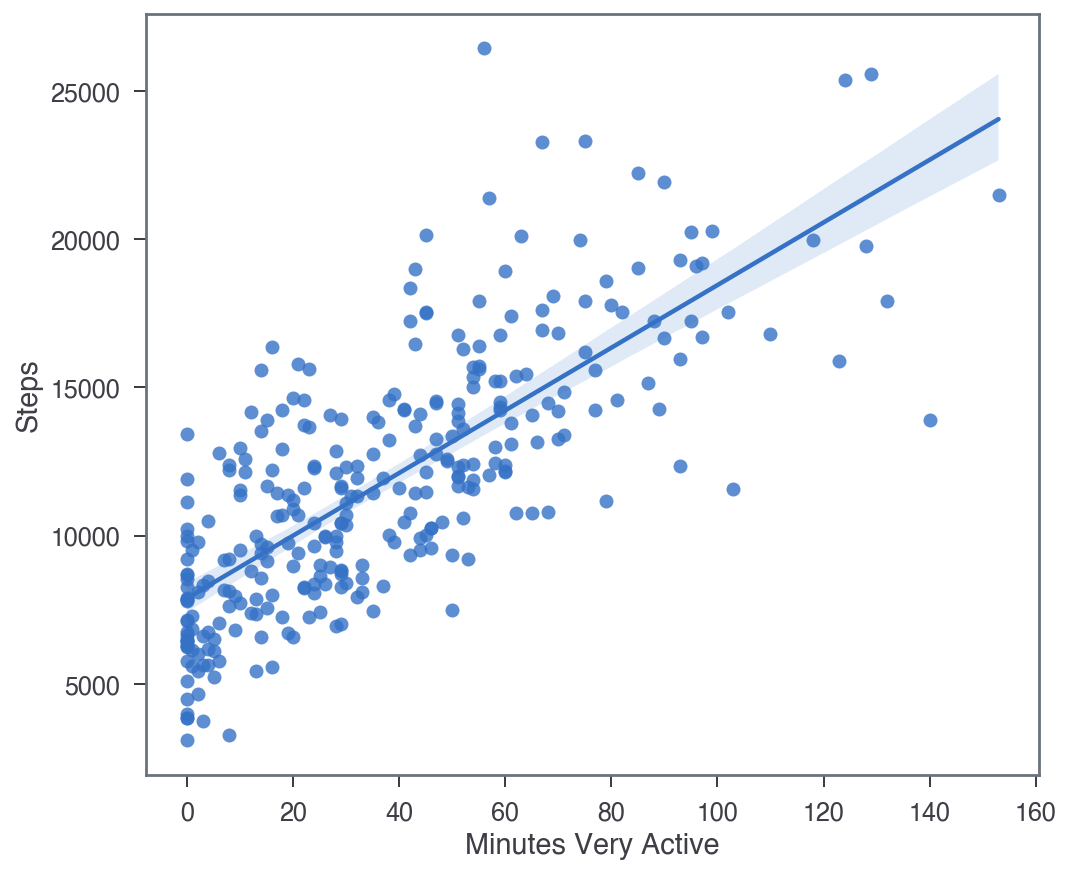

In [158]:
# Just testing without those lower points that seem to ruin the correlation
test = fitbit[fitbit['Steps'] > 3000]
print('Correlation:', test.corr()['Minutes Very Active']['Steps'])

sns.regplot(x = 'Minutes Very Active', y = 'Steps', data = test, fit_reg = True);

#### What can you say about Minutes Very Active and Steps? Write a comment below

In [ ]:
'''
Ok, so we can see that the initial correlation between them was of 0.57, which isn't terrible, but
also not considered a very strong correlation (above 0.7), I believe.

Nevertheless, we can still see that there is a tendency for the points to be moving up diagonally,
even though they are a bit spread apart.

In the cell above I did a test by removing the points below 3k steps and that improved the correlation
by quite a bit, as you can see in the results and in the plot. It is still not perfect, as they are
still disperse on both sides of the regression line, but it is much better now, according to the
correlation score of 0.75, and we see a much clearer tendency for them to be moving up together.
'''

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [159]:
# your answer here
fitbit.corr()['Minutes Sedentary']['Steps']

0.07690608062990092

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

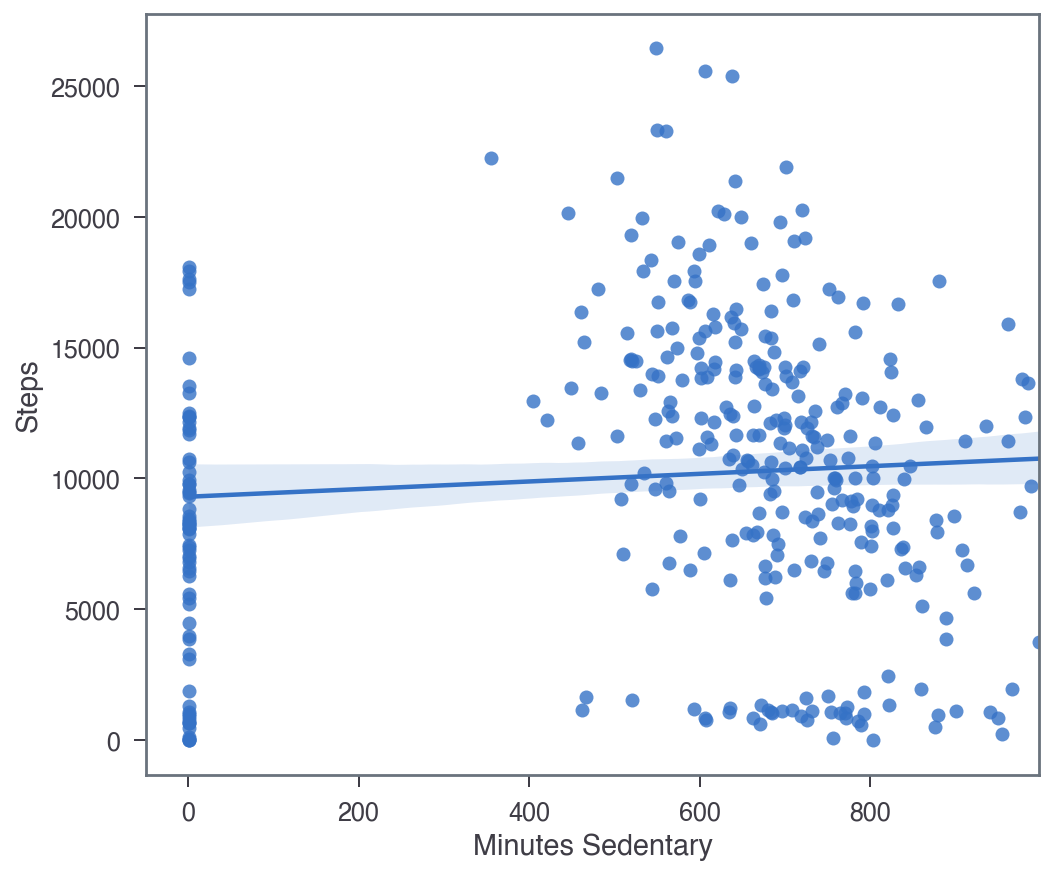

In [161]:
# your answer here
'''
Well, we can definitely see that there is no linear relationship between these two variables, 
considering the correlation score of 0.076 (almost non existent) and the plot we see below.
'''
sns.regplot(x = 'Minutes Sedentary', y = 'Steps', data = fitbit, fit_reg = True);

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [162]:
# your answer here
fitbit.corr()['MinutesOfSleep']['Steps']

0.1309856595083637

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

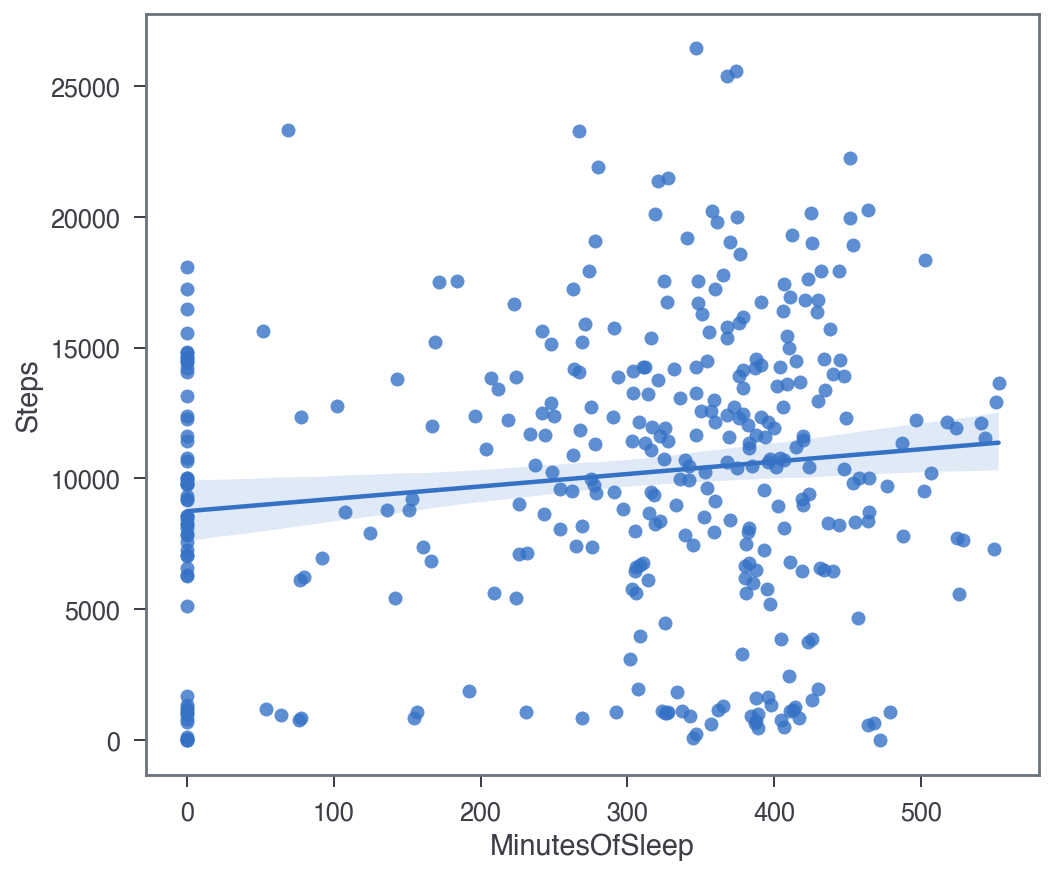

In [163]:
# your answer here
'''
I can say pretty much the same thing I just said about minutes sedentary and steps, which is: there
doesn't seem to be any correlation between these two variables.

Their correlation score is of 0.13, which is super low, and the plot is a mess, which further 
hammers this point home.
'''
sns.regplot(x = 'MinutesOfSleep', y = 'Steps', data = fitbit, fit_reg = True);

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [166]:
# your answer here
fitbit_cut = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 
                  'MinutesOfSleep']]

cor_fit = fitbit_cut.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [172]:
# your answer here
'''
The highest correlated one seems to be 'Minutes Very Active', with a correlation score of 0.57
(which isn't very high, but amongst these ones, it's the highest) whereas the rest is all 
mediocre with 0.3 and below.
'''
cor_fit.sort_values('Steps', ascending = False)[1:]

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [173]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')

time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

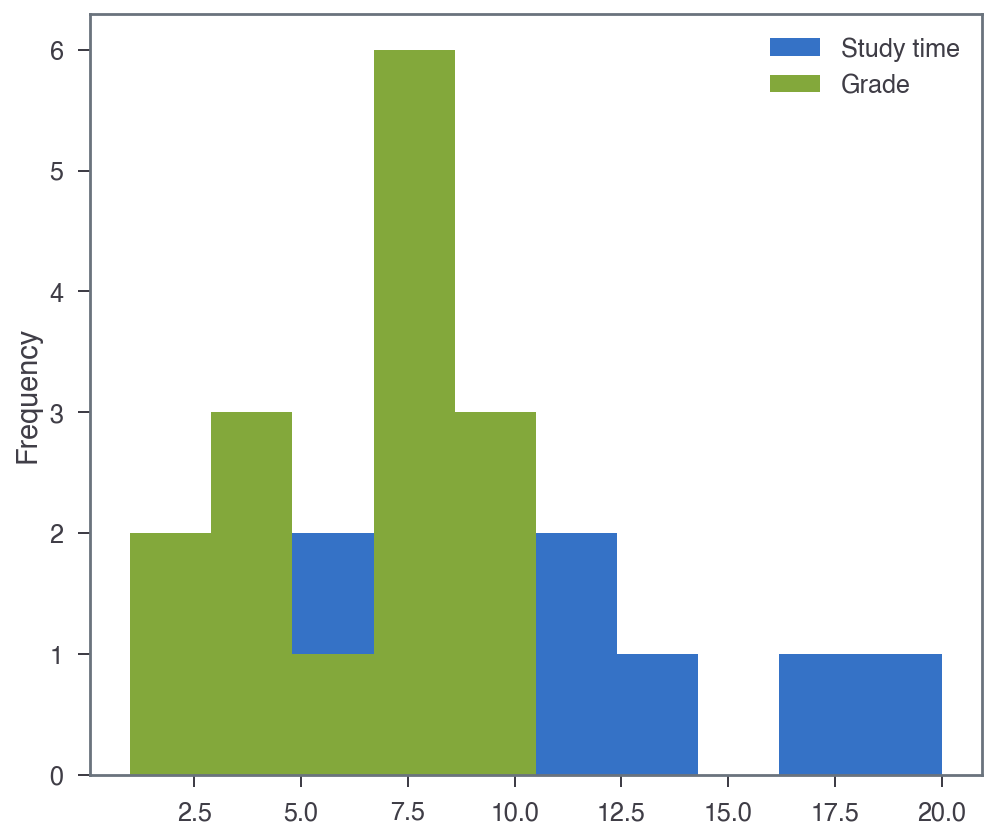

In [184]:
# your answer here
# Ok, whenever I hear 'frequency' I always think about histograms. So I don't know which is the best
# option for this. I will plot all the graphs I can think of and you guys tell me which is the best :D
time_grades.plot(kind = 'hist');

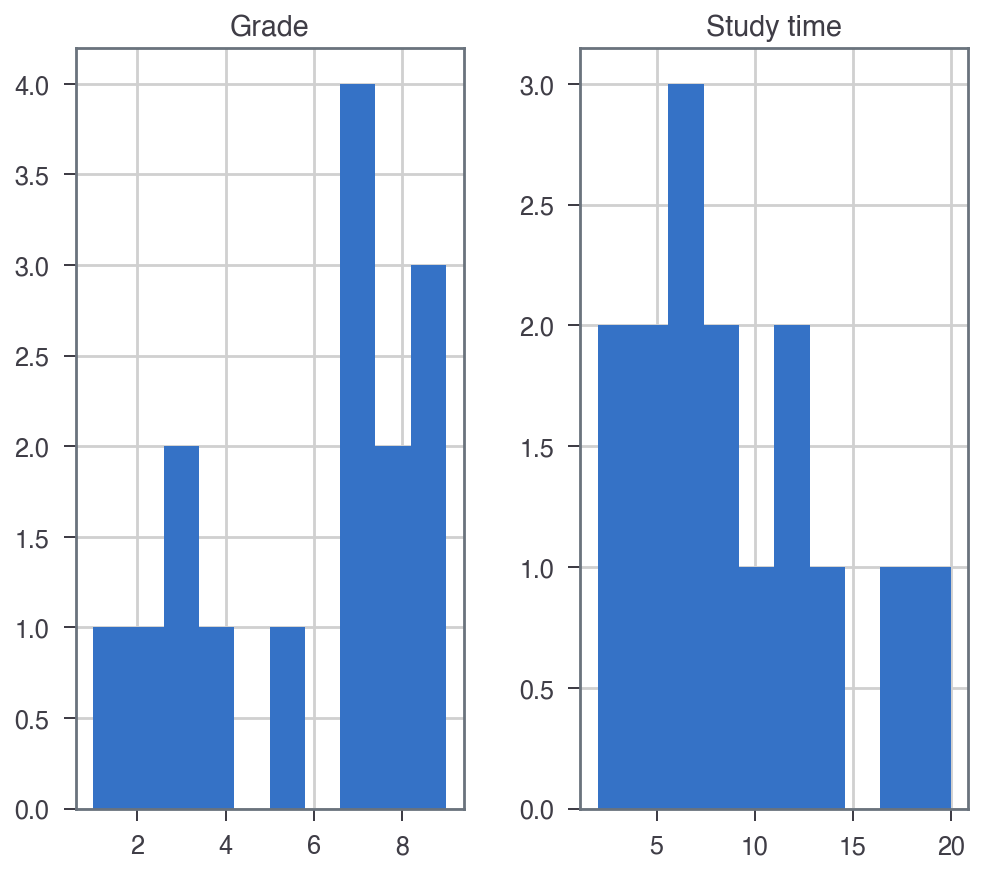

In [203]:
# Why does this give me 2 different graphs, if it's like the same method as above?
time_grades.hist();

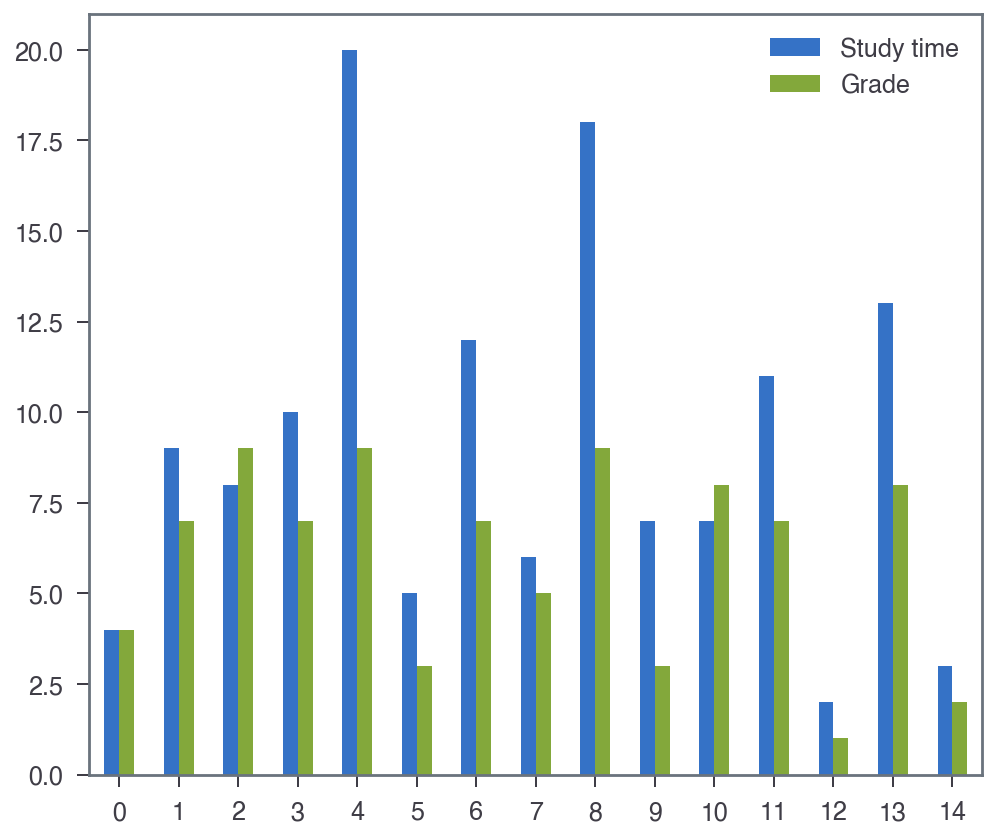

In [193]:
# This one actually seems interesting?
time_grades.plot(kind = 'bar', rot = 0);
#time_grades.plot(x = 'Grade', y = 'Study time', kind = 'bar', rot = 0);

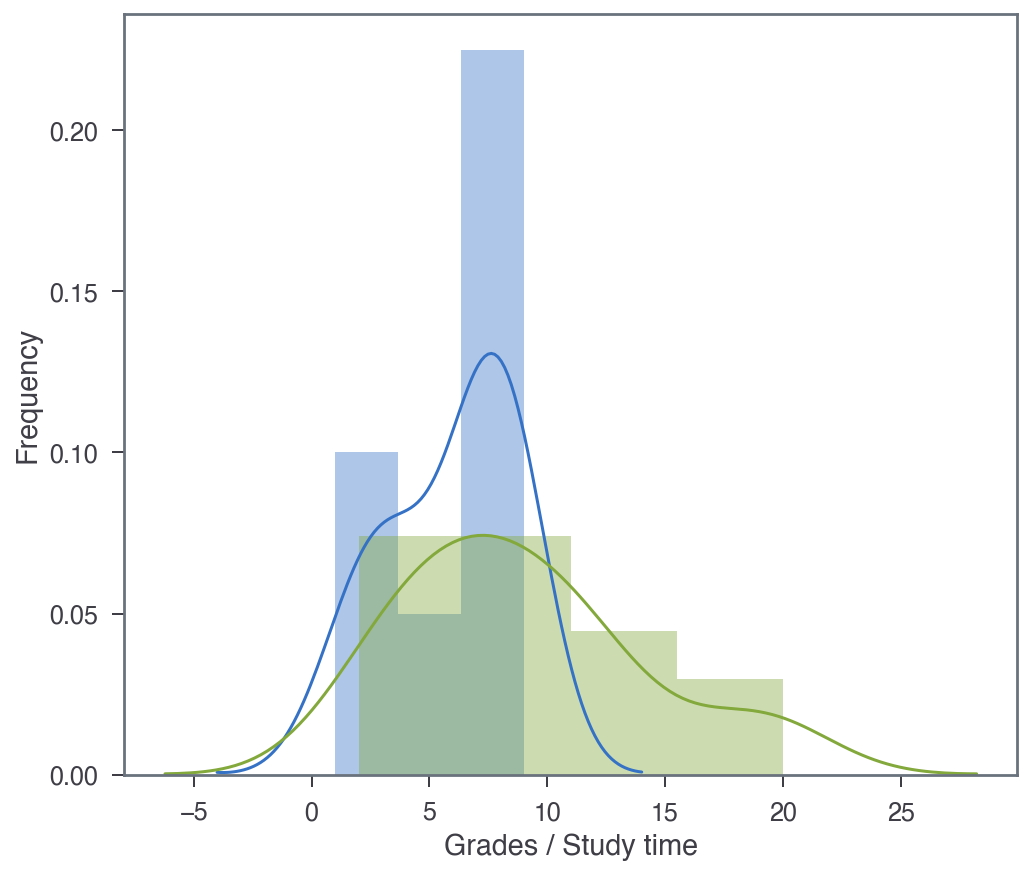

In [224]:
# Together
sns.distplot(time_grades['Grade'])
sns.distplot(time_grades['Study time'])

# Labels
plt.ylabel('Frequency')
plt.xlabel('Grades / Study time');

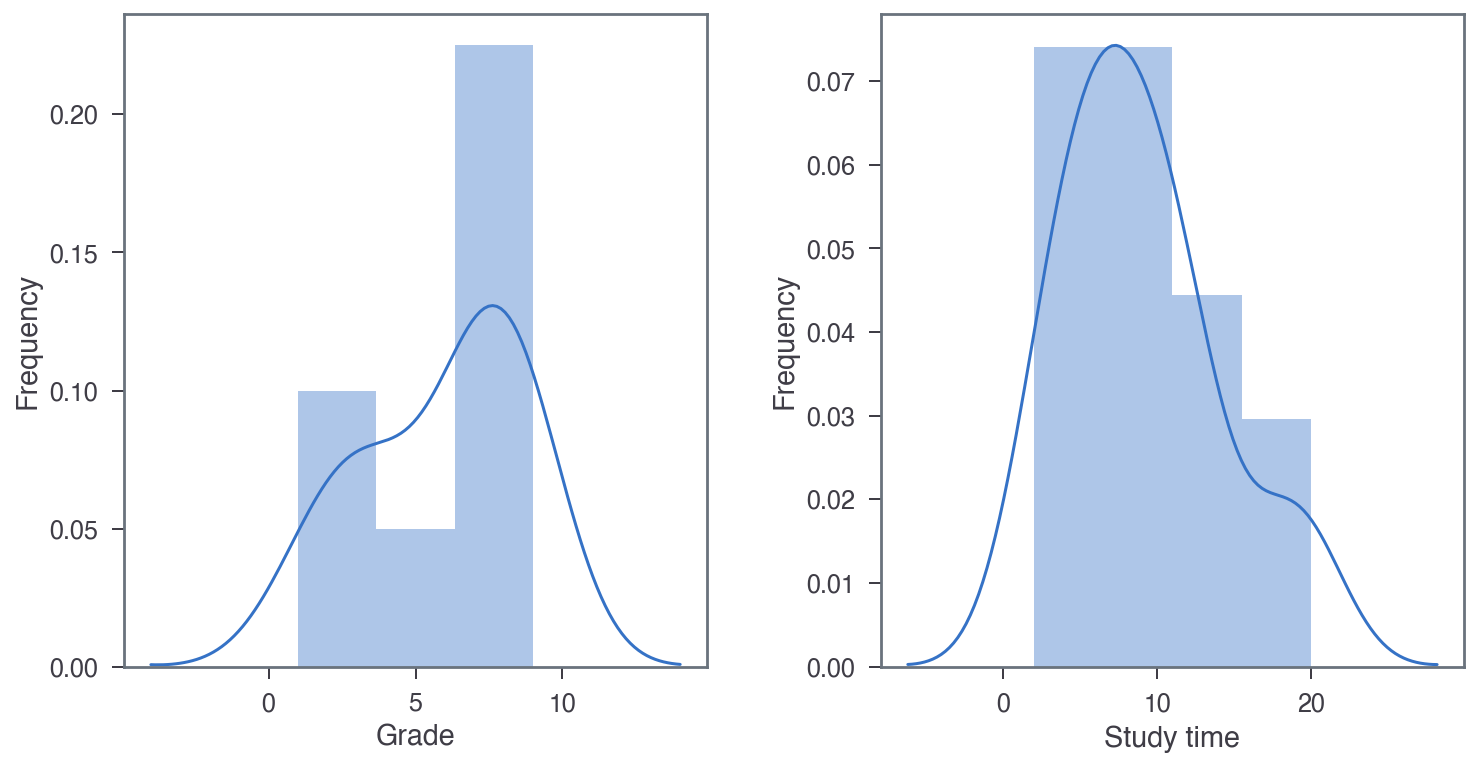

In [226]:
# Split
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
plt.subplots_adjust(wspace = 0.3)

plt.sca(ax[0])
sns.distplot(time_grades['Grade'])
plt.ylabel('Frequency')

plt.sca(ax[1])
sns.distplot(time_grades['Study time'])
plt.ylabel('Frequency');

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [242]:
# your answer here
print('Pearson correlation:', time_grades.corr()['Study time']['Grade']) # pearson is the default
print('Spearman correlation:', time_grades.corr(method = 'spearman')['Study time']['Grade'])

# A little extra 'cause why not? Got curious
print('Kendall correlation:', time_grades.corr(method = 'kendall')['Study time']['Grade'])

# Yes, there seems to be a strong correlation between study time and grade
# Just kendall that is slightly less than the other 2

Pearson correlation: 0.7980456073578855
Spearman correlation: 0.8196587530369419
Kendall correlation: 0.6978603023791088


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

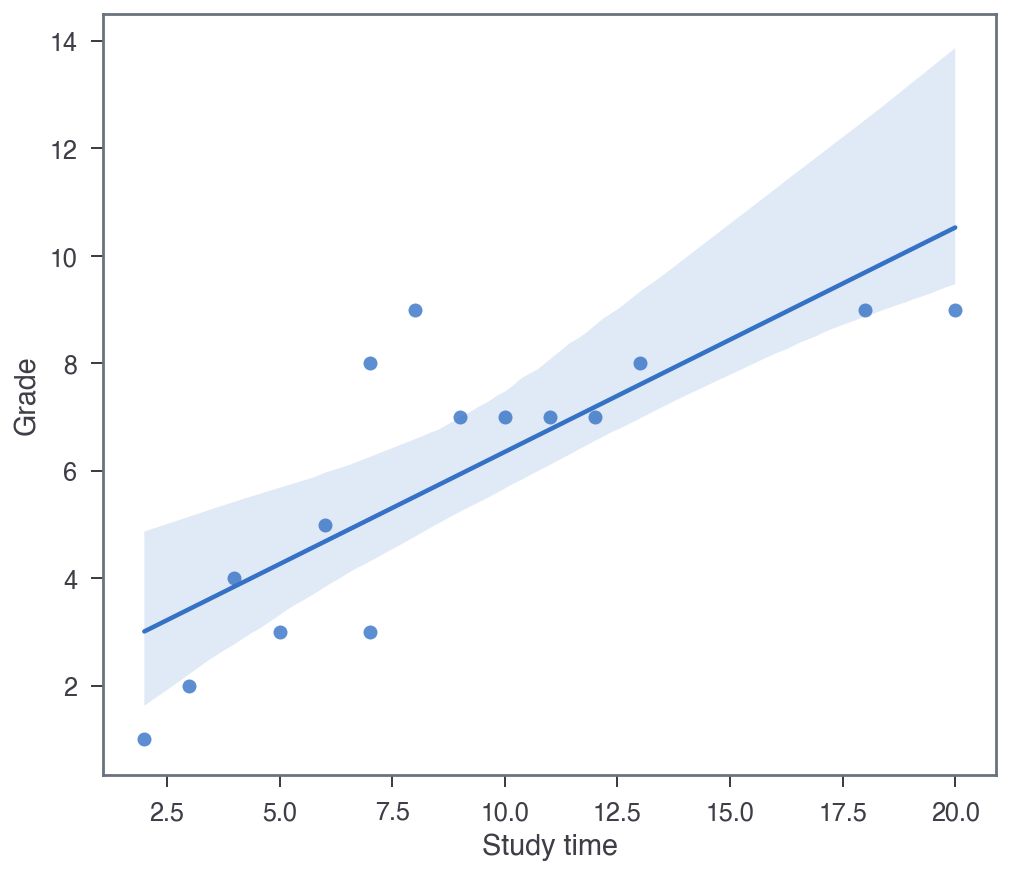

In [254]:
# your answer here

'''
There seems to be a correlation between study time and grade, like we've seen above from the
correlation coefficients. 
The more time you study, you'll be more likely to get a higher grade.
'''
sns.regplot(x = 'Study time', y = 'Grade', data = time_grades);

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
'''
The Pearson method measures linear relationships between variables.
The Spearman's rank correlation have been developed to be more robust than Pearson's, that is, 
more sensitive to nonlinear relationships.
'''